In [22]:
%load_ext autoreload
%autoreload 2 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from itertools import product
from src.utils import flatten_product
from src.bootstrap import bootstrap_downsample
from src.baselines import plot_related_baseline_roc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
cedar = pd.read_csv('../data/mutant/221028_cedar_related_newcore_fold.csv')
prime = pd.read_csv('../data/mutant/221119_prime_related_10fold.csv')

In [20]:
display(cedar.groupby('agg_label').agg(ratio=('Peptide', 'count'))/len(cedar))
display(cedar.groupby('agg_label').agg(count=('Peptide', 'count')))

,ratio
agg_label,
0,0.791955
1,0.208045


,count
agg_label,
0,2402
1,631


In [38]:
result_df, mean_rocs = bootstrap_downsample(cedar, downsample_label=1, downsample_number=106, score_col='EL_rank_mut', target_col='agg_label', n_rounds=1000000, n_jobs = 8)

Sampling


Bootstrapping rounds:   0%|          | 0/1000000 [00:00<?, ?it/s]

Making results DF and curves


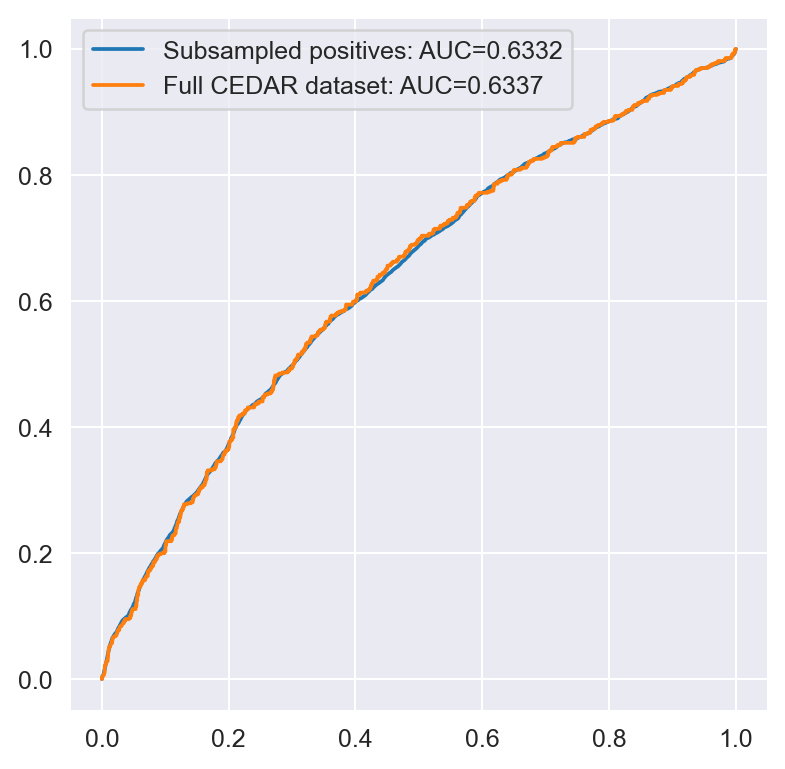

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
f,a = plt.subplots(1,1, figsize=(5,5))
a.plot(mean_rocs[0], mean_rocs[1], label=f'Subsampled positives: AUC={round(mean_rocs[-1], 4)}')

scores = -1*cedar['EL_rank_mut'].values
labels = cedar['agg_label'].values
fpr, tpr, _ = roc_curve(labels, scores)
auc = roc_auc_score(labels, scores)
a.plot(fpr, tpr, label=f'Full CEDAR dataset: AUC={round(auc, 4)}')

a.legend()